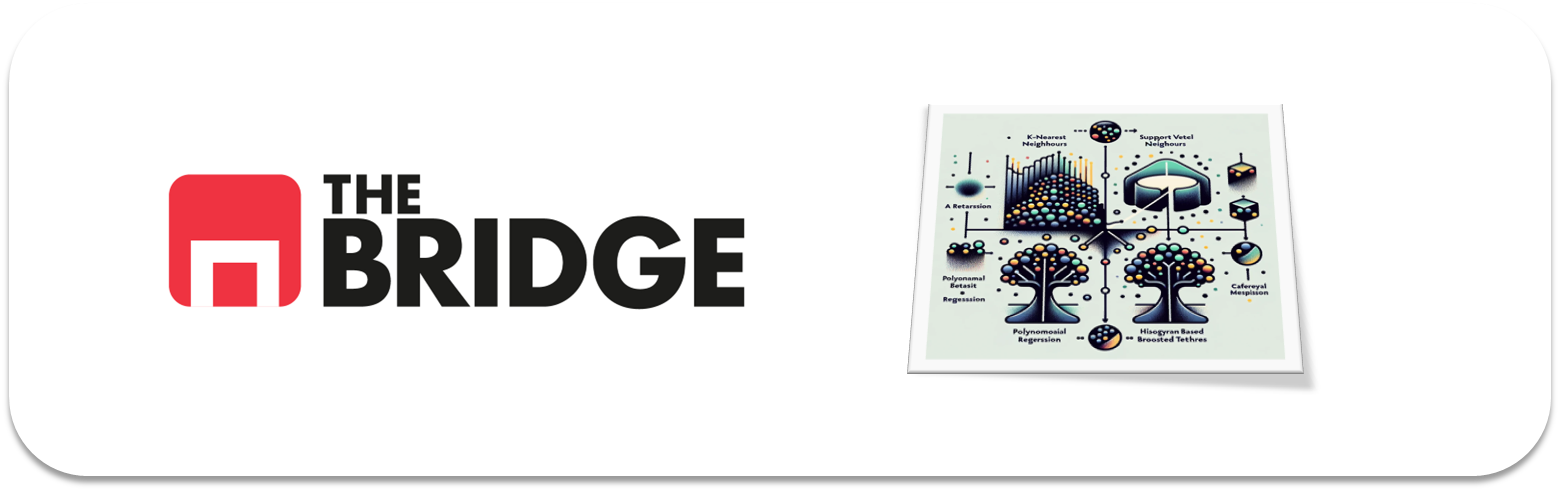

## PRACTICA OBLIGATORIA: **Repaso Aprendizaje Supervisado**

* La práctica obligatoria de esta unidad consiste en resolver sobre un mismo dataset un problema de clasificación y un problema de regresión. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook.

In [239]:
import bootcampviztools as bt
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import seaborn as sns
import toolbox_ML as tl


from lightgbm import LGBMClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, make_scorer, precision_score, ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier
from lightgbm import LGBMRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error,mean_absolute_percentage_error
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from xgboost import XGBRegressor

### #1 Explicación del dataset y carga de datos

Vamos a trabajar con el dataset "Wine Quality", que es un dataset en el que se recogen diversas características fisicoquímicas de las variades tinta y blanca del "Vinho verde" portugués. Las variables del dataset se describen a continuación


1. **Acidez fija**: La mayoría de los ácidos involucrados con el vino son fijos o no volátiles (no se evaporan fácilmente).
2. **Acidez volátil**: La cantidad de ácido acético en el vino, que en niveles demasiado altos puede llevar a un sabor desagradable a vinagre.
3. **Ácido cítrico**: Encontrado en pequeñas cantidades, el ácido cítrico puede añadir 'frescura' y sabor a los vinos.
4. **Azúcar residual**: Es la cantidad de azúcar restante después de que se detiene la fermentación, es raro encontrar vinos con menos de 1 gramo/litro y vinos con más de 45 gramos/litro se consideran dulces.
5. **Cloruros**: La cantidad de sal en el vino.
6. **Dióxido de azufre libre**: La porción libre de SO2 existe en equilibrio entre el SO2 molecular (como un gas disuelto) y el ion bisulfito; previene el crecimiento microbiano y la oxidación del vino.
7. **Dióxido de azufre total**: Es la cantidad de formas libres y ligadas de S02; en bajas concentraciones, el SO2 es en su mayoría indetectable en el vino, pero en concentraciones libres de más de 50 ppm, el SO2 se hace evidente en la nariz y el sabor del vino.
8. **Densidad**: La densidad del vino es cercana a la del agua dependiendo del porcentaje de alcohol y contenido de azúcar.
9. **pH**: Describe qué tan ácido o básico es un vino en una escala de 0 (muy ácido) a 14 (muy básico); la mayoría de los vinos están entre 3-4 en la escala de pH.
10. **Sulfatos**: Un aditivo del vino que puede contribuir a los niveles de dióxido de azufre (SO2), que actúa como un antimicrobiano y antioxidante.
11. **Alcohol**: El porcentaje de contenido de alcohol del vino.
12. **Calidad**: Una variable de salida (basada en datos sensoriales, puntuación entre 0 y 10).
13. **Class**: Si es blanco o tinto.



Carga el dataset "wines_dataset.csv", muestra sus primeras filas, su información general y define dos variables target una para clasificación que permita predecir la calidad del vino según el resto de propiedas y otra variable target para regresión que permita predecir el grado alcohólico del vino a partir del resto de propiedades. 

El **objetivo de negocio en el primer problema** será anticipar la posible clasificación de sus vinos por los catadores profesionales y a partir de ahí poder planificar la producción, distribución y precio a poner a cada vino. En este sentido, el "cliente" nos dice que le gustaría poder clasificar correctamente lo mejor posible en media  (que interpretamos como el mejor recall medio posible).

El **objetivo de negocio en el segundo problema** (bastante artificial) es poder hacer simulaciones de posibles vinos futuros para saber cómo conseguir variedades más o menos alcohólicas para atender mercados diferentes. En este sentido, les interesa equivocarse lo menos posible porcentualmente sobre el grado alochólico real.

Muestra la distribución de ambos targets y haz un pequeño assesment previo de cada problema. NOTA: El dataset está limpio y sin valores faltantes.

In [5]:
df=pd.read_csv("./data/wines_dataset.csv",sep="|")

In [6]:
df.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,class
0,8.5,0.21,0.26,9.25,0.034,73.0,142.0,0.99450,3.05,0.37,11.4,6,white
1,8.3,0.16,0.37,7.90,0.025,38.0,107.0,0.99306,2.93,0.37,11.9,6,white
2,6.8,0.18,0.38,1.40,0.038,35.0,111.0,0.99180,3.32,0.59,11.2,7,white
3,6.1,0.26,0.25,2.90,0.047,289.0,440.0,0.99314,3.44,0.64,10.5,3,white
4,7.5,0.63,0.27,2.00,0.083,17.0,91.0,0.99616,3.26,0.58,9.8,6,red


In [37]:
target_c=["quality"]
target_r=["alcohol"]

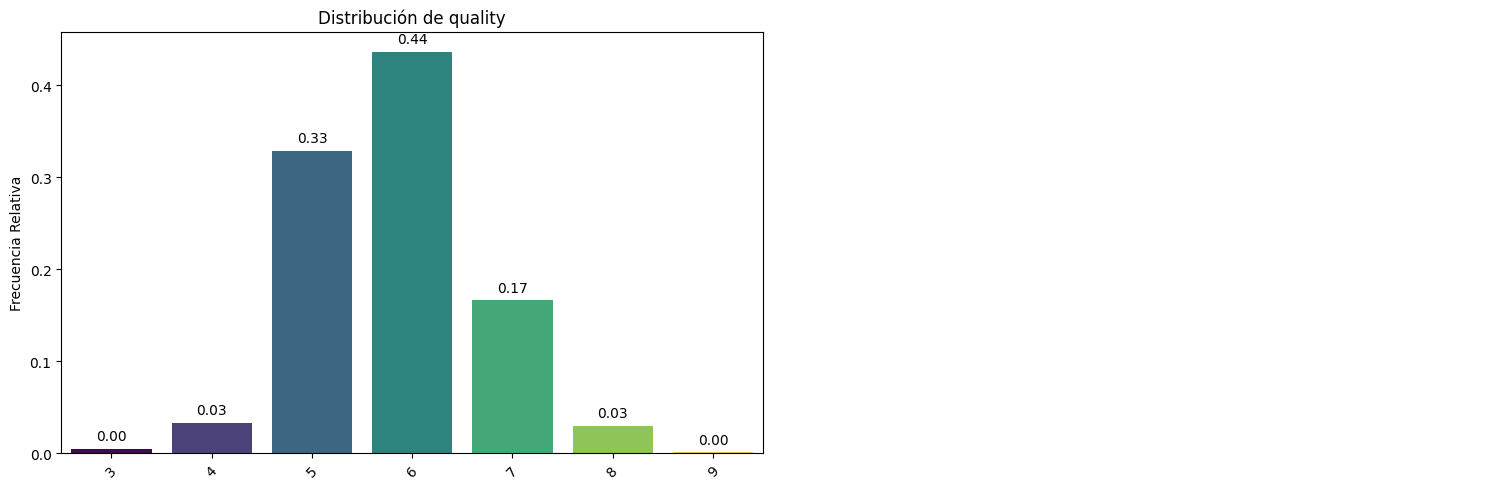

In [38]:
bt.pinta_distribucion_categoricas(df, target_c, relativa=True,mostrar_valores=True )

<Axes: ylabel='Count'>

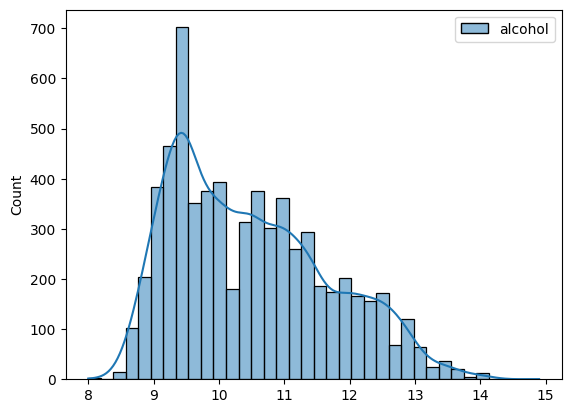

In [39]:
sns.histplot(df[target_r], kde = True)

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  class                 6497 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [41]:
df["quality"].value_counts()

quality
6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: count, dtype: int64

In [42]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,6497.0,7.215307,1.296434,3.80000,6.40000,7.00000,7.70000,15.90000
volatile acidity,6497.0,0.339666,0.164636,0.08000,0.23000,0.29000,0.40000,1.58000
citric acid,6497.0,0.318633,0.145318,0.00000,0.25000,0.31000,0.39000,1.66000
residual sugar,6497.0,5.443235,4.757804,0.60000,1.80000,3.00000,8.10000,65.80000
chlorides,6497.0,0.056034,0.035034,0.00900,0.03800,0.04700,0.06500,0.61100
free sulfur dioxide,6497.0,30.525319,17.749400,1.00000,17.00000,29.00000,41.00000,289.00000
total sulfur dioxide,6497.0,115.744574,56.521855,6.00000,77.00000,118.00000,156.00000,440.00000
density,6497.0,0.994697,0.002999,0.98711,0.99234,0.99489,0.99699,1.03898
pH,6497.0,3.218501,0.160787,2.72000,3.11000,3.21000,3.32000,4.01000
sulphates,6497.0,0.531268,0.148806,0.22000,0.43000,0.51000,0.60000,2.00000


### #2 Modelado para clasificación

Crea un modelo que permita clasificar lo mejor posible los vinos en función de su calidad, o dicho de otro modo que prediga de la mejor manera posible la calidad de un vino a partir de sus propiedades químicas. ***Considéralo un problema de clasificación***, donde los valores de calidad son las clases a predecir. Puedes utilizar los modelos que creas conveniente, al menos tres, y utiliza un KNN como modelo baseline, prueba al menos con 2 valores de K. Intenta mejorar el "recall medio" con las técnicas que creas conveniente. Compara los modelos utilizando validación cruzada con o sin optimización previa de hiperparámetros (aunque en la sesión en vivo por limitación de tiempos sólo lo haremos con validación cruzada). El modelo elegido si tiene que tener un ejemplo de optimización de parámetros.

Evalúa el modelo, analiza los errores y propón algún mecanismo de mejora aunque sea sólo un esbozo.

In [43]:
train_set, test_set = train_test_split(df, test_size= 0.2, random_state= 42)

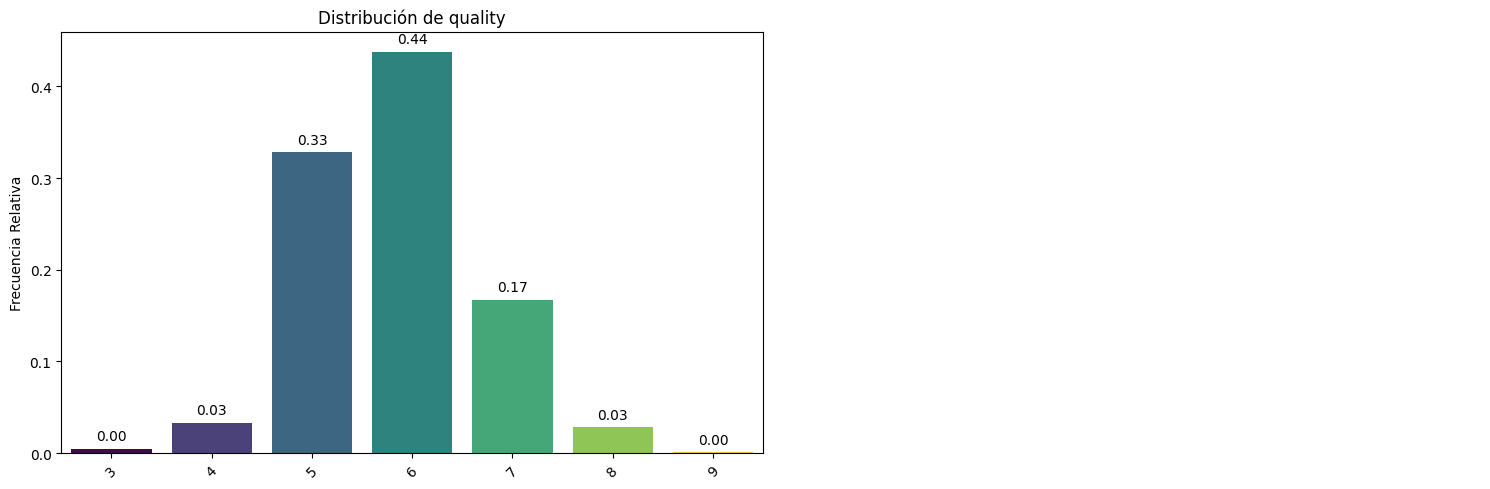

In [44]:
bt.pinta_distribucion_categoricas(train_set,target_c, relativa=True, mostrar_valores=True)

In [45]:
train_set["class"] = train_set["class"].apply(lambda row: 1 if row == "white" else 0)
test_set["class"] = test_set["class"].apply(lambda row: 1 if row == "white" else 0)

In [46]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5197 entries, 1916 to 860
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         5197 non-null   float64
 1   volatile acidity      5197 non-null   float64
 2   citric acid           5197 non-null   float64
 3   residual sugar        5197 non-null   float64
 4   chlorides             5197 non-null   float64
 5   free sulfur dioxide   5197 non-null   float64
 6   total sulfur dioxide  5197 non-null   float64
 7   density               5197 non-null   float64
 8   pH                    5197 non-null   float64
 9   sulphates             5197 non-null   float64
 10  alcohol               5197 non-null   float64
 11  quality               5197 non-null   int64  
 12  class                 5197 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 568.4 KB


In [47]:
train_set

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,class
1916,7.9,0.18,0.40,2.20,0.049,38.0,67.0,0.99600,3.33,0.93,11.3,5,0
947,7.1,0.18,0.74,15.60,0.044,44.0,176.0,0.99960,3.38,0.67,9.0,6,1
877,7.6,0.51,0.24,1.20,0.040,10.0,104.0,0.99200,3.05,0.29,10.8,6,1
2927,6.0,0.25,0.28,7.70,0.053,37.0,132.0,0.99489,3.06,0.50,9.4,6,1
6063,9.0,0.38,0.41,2.40,0.103,6.0,10.0,0.99604,3.13,0.58,11.9,7,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3772,6.4,0.24,0.50,11.60,0.047,60.0,211.0,0.99660,3.18,0.57,9.3,5,1
5191,6.6,0.22,0.28,12.05,0.058,25.0,125.0,0.99856,3.45,0.45,9.4,5,1
5226,6.6,0.20,0.38,7.90,0.052,30.0,145.0,0.99470,3.32,0.56,11.0,7,1
5390,7.3,0.41,0.29,1.80,0.032,26.0,74.0,0.98889,2.96,0.35,13.0,8,1


In [51]:
target_c="quality"

In [52]:
features_num = train_set.columns.to_list()
features_num.remove(target_c) # Aunque luego lo iré añadiendo para ir comparando con el target

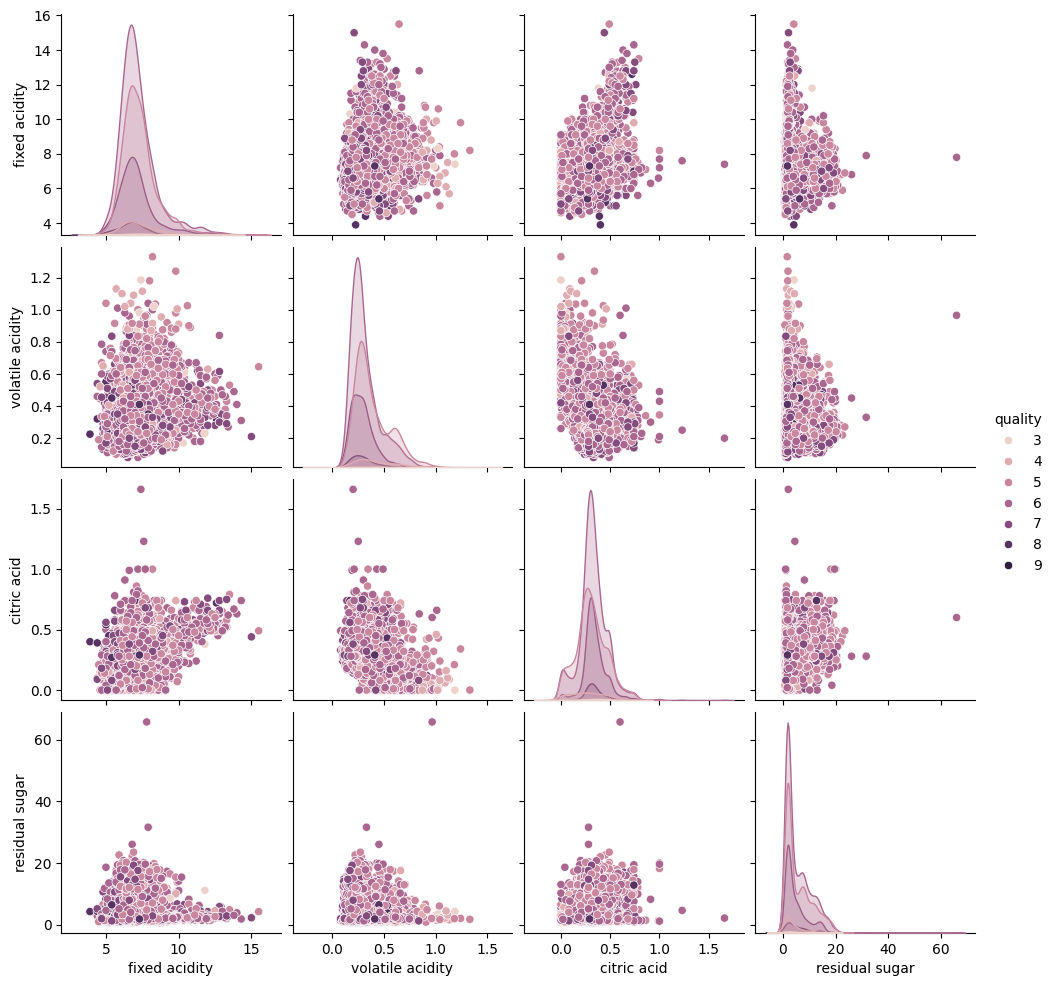

In [64]:
sns.pairplot(train_set[features_num[0:4] + [target_c]], hue = target_c)

In [70]:
to_investigate= ["fixed acidity","volatile acidity"]

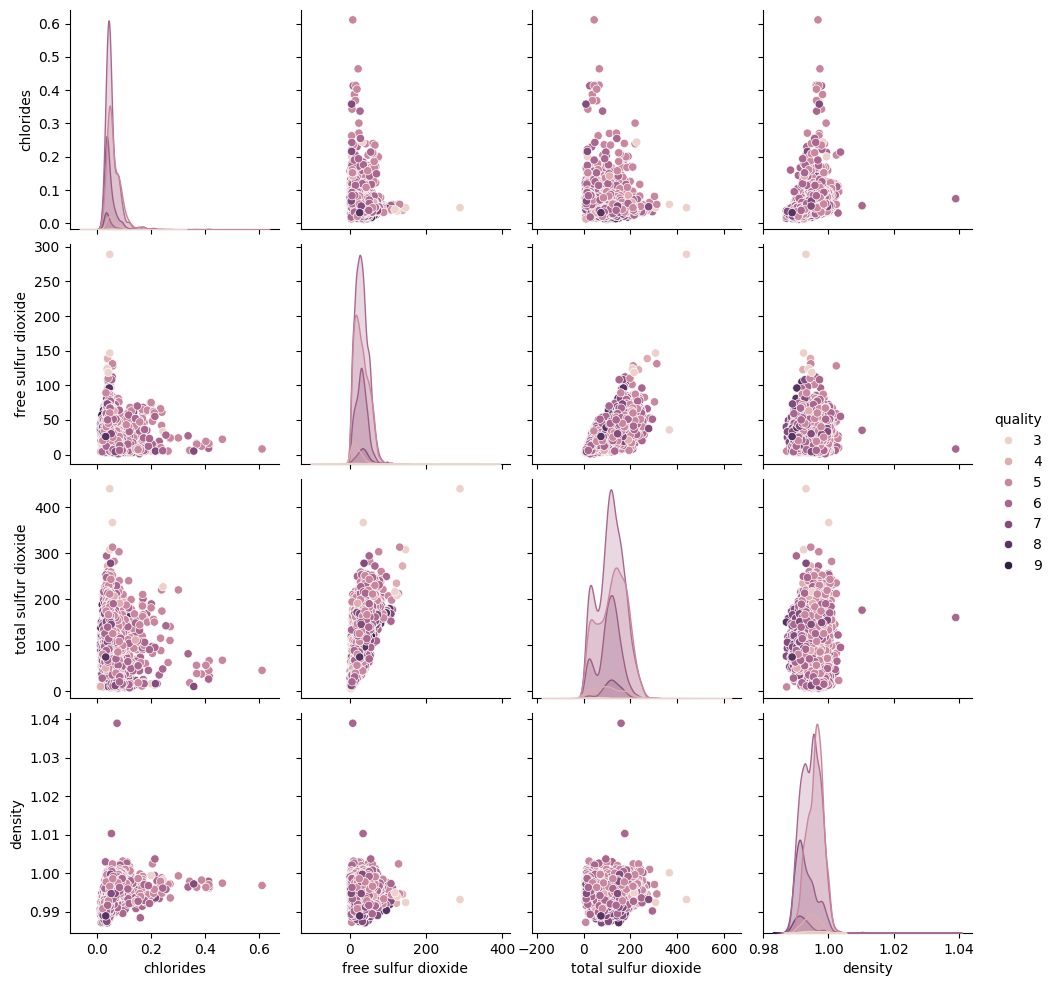

In [65]:
sns.pairplot(train_set[features_num[4:8] + [target_c]], hue = target_c)

In [72]:
to_investigate=['fixed acidity', 'volatile acidity','density']

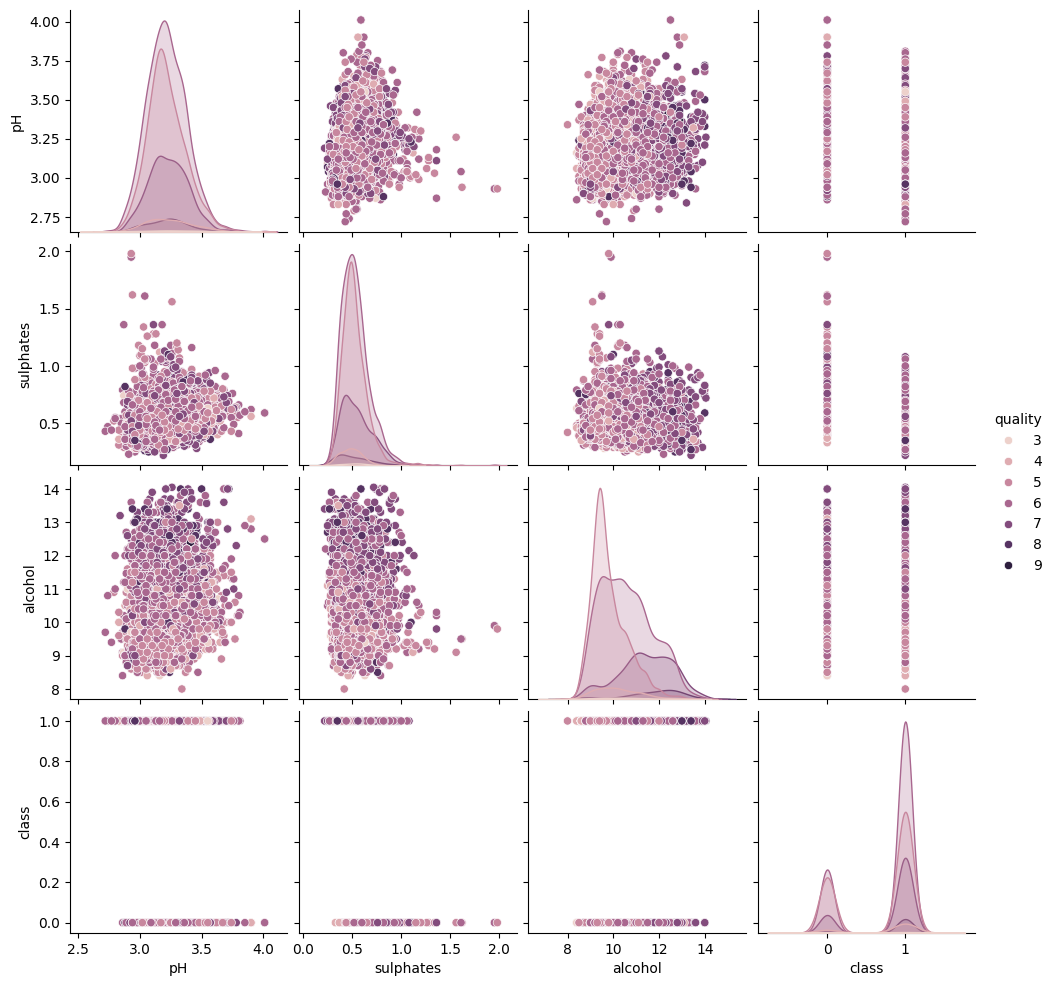

In [66]:
sns.pairplot(train_set[features_num[8:13] + [target_c]], hue = target_c)

In [73]:
to_investigate=['fixed acidity', 'volatile acidity','density','sulphates','alcohol','class']

In [68]:
corr = train_set.corr(numeric_only= True)
corr

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,class
fixed acidity,1.000000,0.214472,0.326562,-0.118995,0.305645,-0.287637,-0.339255,0.453447,-0.249151,0.300749,-0.091964,-0.071698,-0.489122
volatile acidity,0.214472,1.000000,-0.386228,-0.194152,0.373995,-0.346059,-0.412218,0.271523,0.272458,0.225499,-0.036041,-0.255368,-0.652963
citric acid,0.326562,-0.386228,1.000000,0.138600,0.030761,0.123664,0.191429,0.091340,-0.331794,0.044118,-0.005690,0.096020,0.189034
residual sugar,-0.118995,-0.194152,0.138600,1.000000,-0.134384,0.402099,0.494696,0.555320,-0.264614,-0.184385,-0.357459,-0.039630,0.353771
chlorides,0.305645,0.373995,0.030761,-0.134384,1.000000,-0.198295,-0.287617,0.368711,0.064569,0.363855,-0.260508,-0.197389,-0.523182
free sulfur dioxide,-0.287637,-0.346059,0.123664,0.402099,-0.198295,1.000000,0.723322,0.030430,-0.149549,-0.188514,-0.188460,0.039678,0.468220
total sulfur dioxide,-0.339255,-0.412218,0.191429,0.494696,-0.287617,0.723322,1.000000,0.034341,-0.241483,-0.281053,-0.272970,-0.050816,0.701692
density,0.453447,0.271523,0.091340,0.555320,0.368711,0.030430,0.034341,1.000000,0.018402,0.260861,-0.682345,-0.305107,-0.384596
pH,-0.249151,0.272458,-0.331794,-0.264614,0.064569,-0.149549,-0.241483,0.018402,1.000000,0.204925,0.116497,0.011918,-0.338300
sulphates,0.300749,0.225499,0.044118,-0.184385,0.363855,-0.188514,-0.281053,0.260861,0.204925,1.000000,0.000412,0.052398,-0.493462


In [76]:
features_num = ['fixed acidity', 'volatile acidity','density','sulphates','alcohol','class']

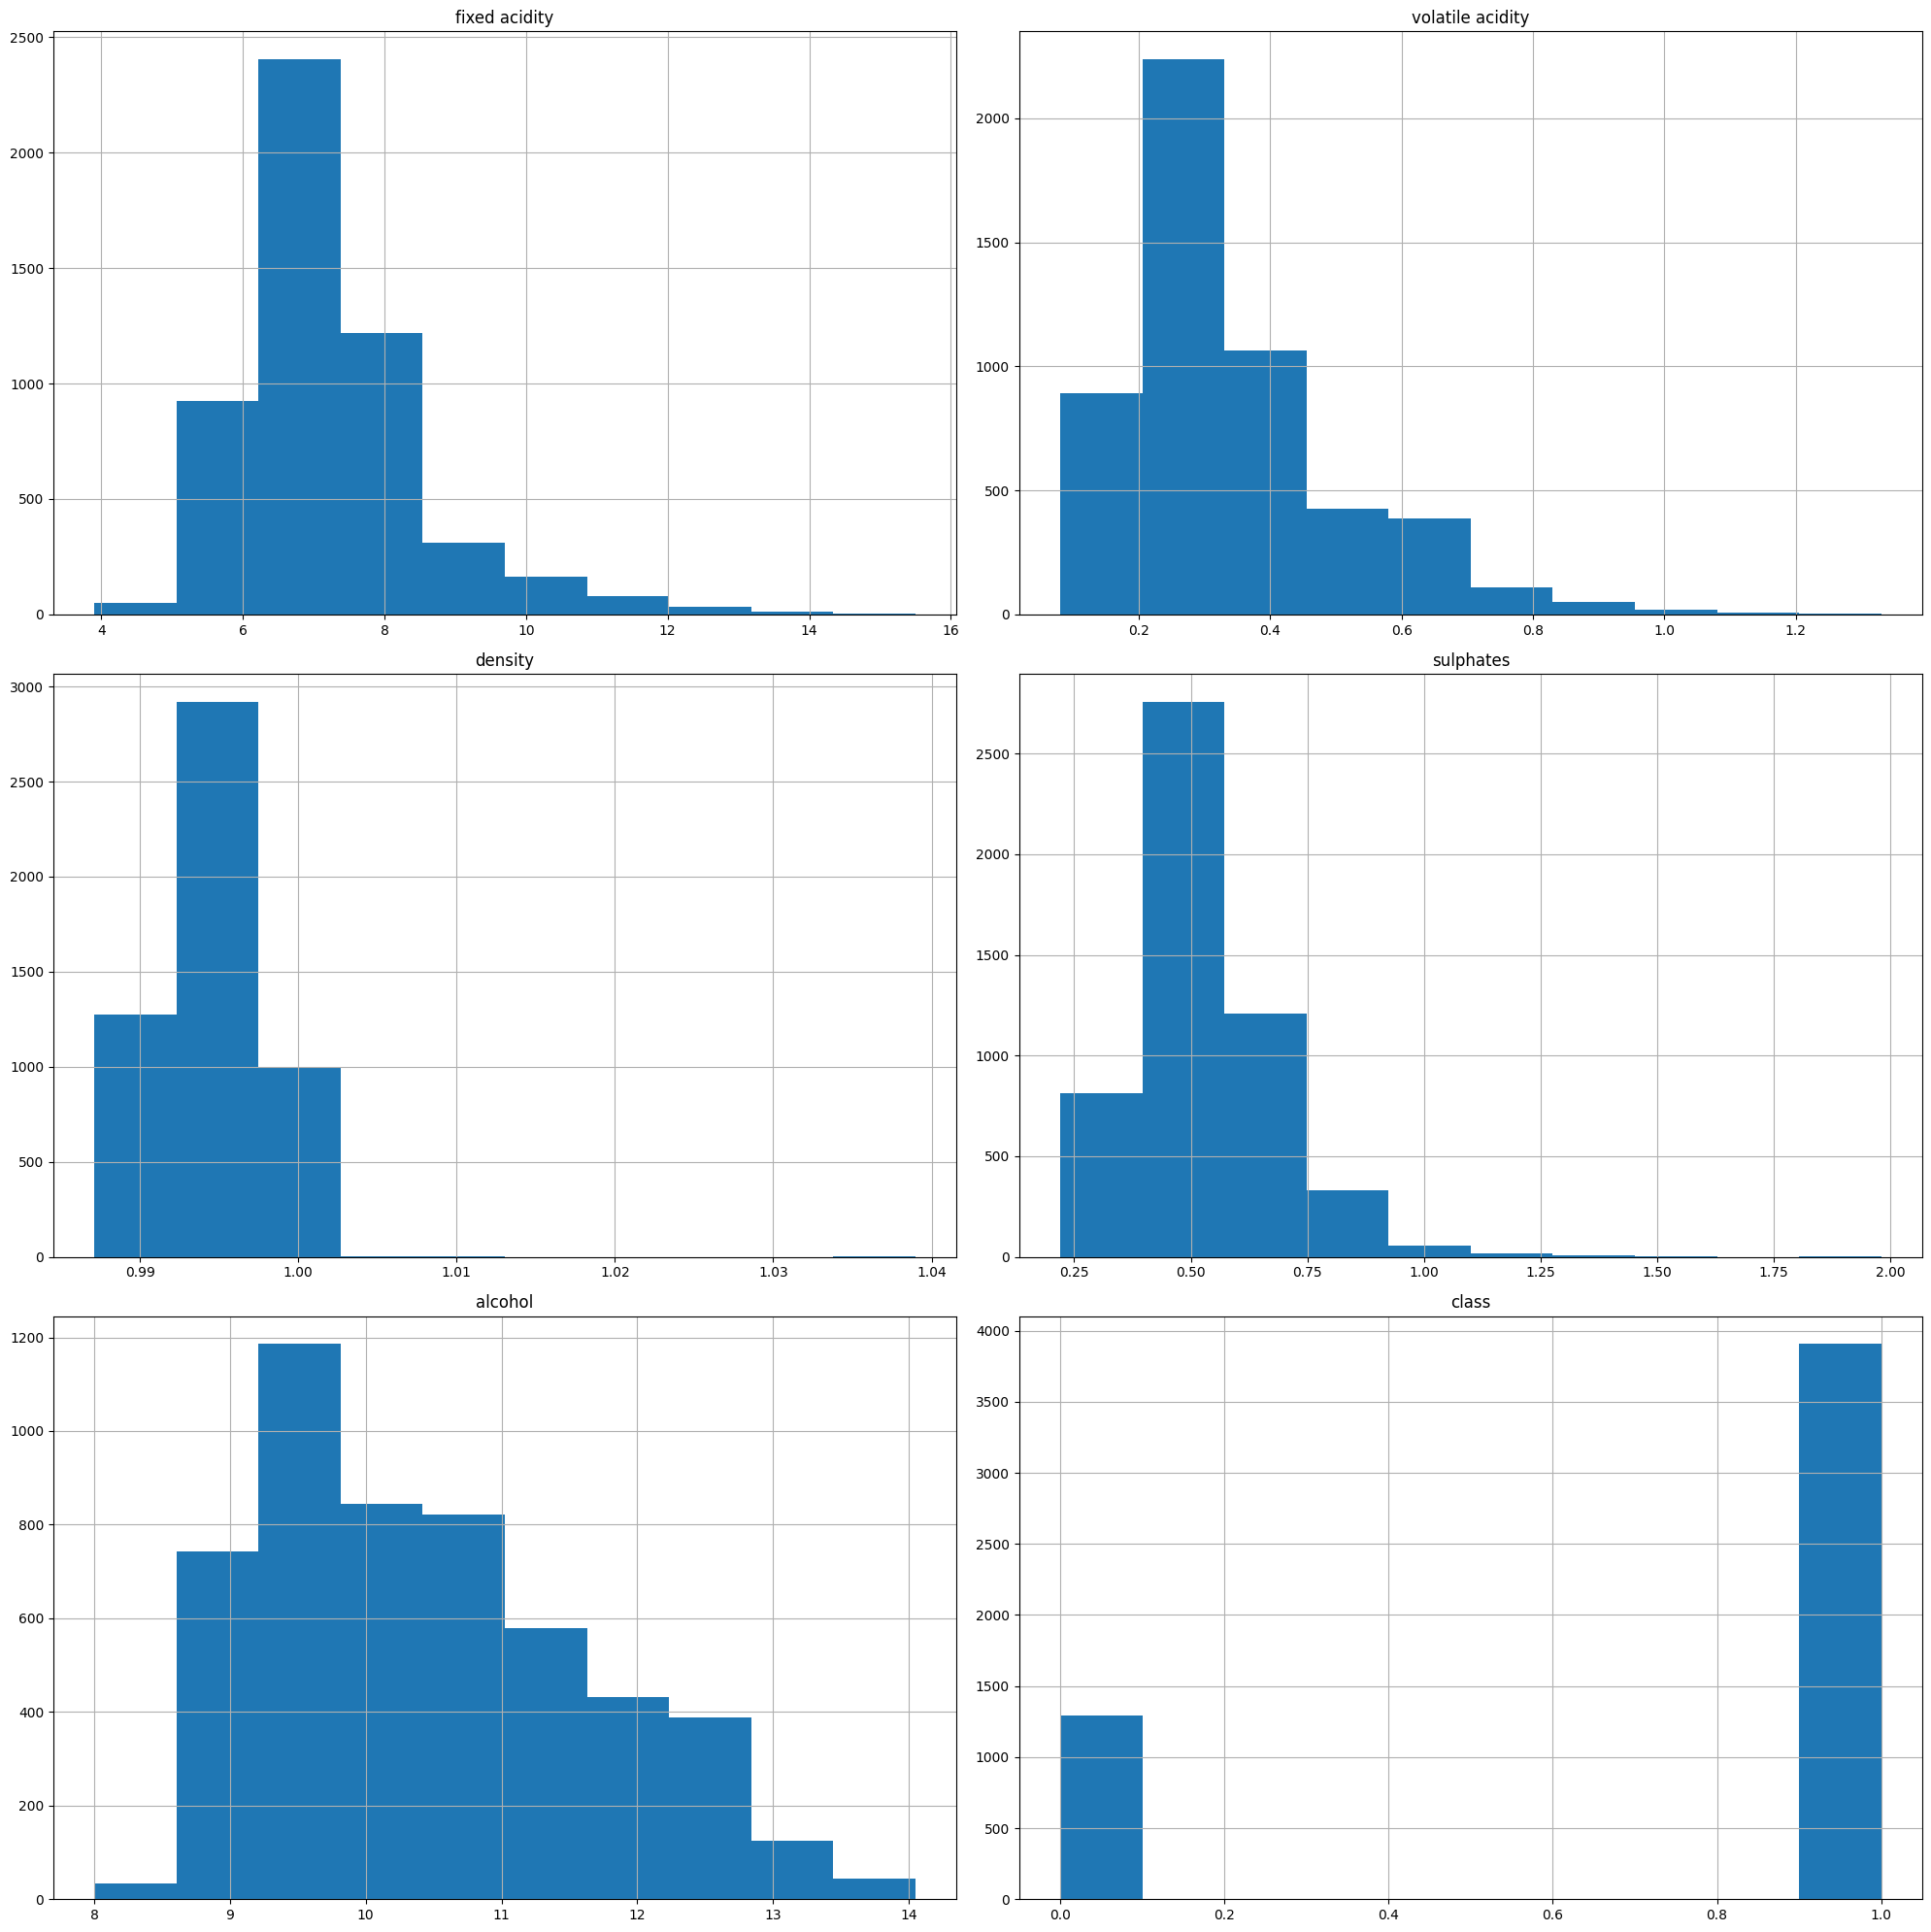

In [77]:
train_set[features_num].hist(figsize = (20,20))
plt.tight_layout()

In [84]:
features_to_transform = ['fixed acidity', 'volatile acidity','density','sulphates','alcohol']

In [90]:
features_num

['fixed acidity',
 'volatile acidity',
 'density',
 'sulphates',
 'alcohol',
 'class']

In [95]:
features_to_use = ['fixed acidity', 'volatile acidity','density','sulphates','alcohol','quality']

In [85]:
train_set_scaled = train_set.copy()
test_set_scaled = test_set.copy()

In [96]:
train_set = train_set[features_to_use].copy()
test_set = test_set[features_to_use].copy()

train_set_scaled = train_set[features_to_use].copy()
test_set_scaled = test_set[features_to_use].copy()

In [101]:
scaler = StandardScaler()
train_set_scaled[features_to_transform] = scaler.fit_transform(train_set_scaled[features_to_transform])
test_set_scaled[features_to_transform] = scaler.transform(test_set_scaled[features_to_transform])

In [109]:
X_train= train_set.drop("quality", axis=1)
y_train = (train_set[target_c])
X_test= test_set.drop("quality", axis=1)
y_test = (test_set[target_c] )

In [110]:
X_train_scaled= train_set_scaled.drop("quality", axis=1)
X_test_scaled= test_set_scaled.drop("quality", axis=1)

In [141]:
from sklearn.neighbors import KNeighborsClassifier
n_neighbors = 5

knn = KNeighborsClassifier(n_neighbors)
knn.fit(X_train_scaled, y_train)

KNeighborsClassifier()

In [142]:
print(np.mean(cross_val_score(knn, X_train_scaled, y_train, cv = 5, scoring = "balanced_accuracy")))

0.2408108976180968


In [143]:
from sklearn.neighbors import KNeighborsClassifier
n_neighbors = 3

knn_2 = KNeighborsClassifier(n_neighbors)
knn_2.fit(X_train_scaled, y_train)

KNeighborsClassifier(n_neighbors=3)

In [144]:
print(np.mean(cross_val_score(knn_2, X_train_scaled, y_train, cv = 5, scoring = "balanced_accuracy")))

0.25725800222269923


In [145]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

In [160]:
lr_clf = LogisticRegression(max_iter = 1000)
lr_clf.fit(X_train_scaled, y_train)


LogisticRegression(max_iter=1000)

In [161]:
print(np.mean(cross_val_score(lr_clf, X_train_scaled, y_train, cv = 5, scoring = "balanced_accuracy")))

0.21524611603173088


In [148]:
rf_clf = RandomForestClassifier(max_depth=6, random_state=42)
rf_clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=6, random_state=42)

In [149]:
np.mean(cross_val_score(lr_clf, X_train, y_train, cv=5, scoring='balanced_accuracy'))


np.float64(0.21277163955771922)

In [150]:
lgb_clf = LGBMClassifier(max_depth= 6, random_sate = 42, verbose = -100)
lgb_clf.fit(X_train, y_train)

LGBMClassifier(max_depth=6, random_sate=42, verbose=-100)

In [151]:
np.mean(cross_val_score(lgb_clf, X_train, y_train, cv=5, scoring='balanced_accuracy'))

np.float64(0.28372429932322796)

In [156]:
lr_clf = LogisticRegression(class_weight = "balanced", max_iter = 10000)
lr_clf.fit(X_train_scaled, y_train)

LogisticRegression(class_weight='balanced', max_iter=10000)

In [157]:
np.mean(cross_val_score(lr_clf, X_train_scaled, y_train, cv=5, scoring='balanced_accuracy'))

np.float64(0.3446841098943697)

In [173]:
from imblearn.over_sampling import SMOTE 
smote = SMOTE(random_state=42,k_neighbors=2)
X_train_smote, y_train_smote = smote.fit_resample(X_train,y_train)

In [174]:
y_train_smote.value_counts()

quality
5    2274
6    2274
7    2274
3    2274
4    2274
8    2274
9    2274
Name: count, dtype: int64

In [175]:
n_neighbors = 5

knn_3 = KNeighborsClassifier(n_neighbors)
knn_3.fit(X_train_smote, y_train_smote)

KNeighborsClassifier()

### Podemos observar que esta muy desbalanceado la target, por eso ningu modelo nos da una buena metrica

### #3 Modelado para regresión

Reutiliza todo lo que puedas la preparación del modelado de la parte anterior y construye ahora el mejor modelo que puedas para predecir el grado alcohólico de un vino dadas sus características fisico químicas, su clase y la puntuación de calidad que le ha sido otorgada. Compara al menos tres tipos de modelos, seleccionando una métrica adecuada de comparación y escoge el más apropiado empleando validación cruzada antes o después de optimizar hiperparámetros (en la sesión en vivo lo haremos antes por cuestiones de tiempo). Evalúa el modelo escogido y con los hiperparámetros ajustados de la mejor manera que puedas. Para terminar realizar un pequeño análisis de errores.

In [191]:
train_set_r, test_set_r = train_test_split(df, test_size= 0.2, random_state= 42)

In [203]:
target_r="alcohol"

<Axes: xlabel='alcohol', ylabel='Count'>

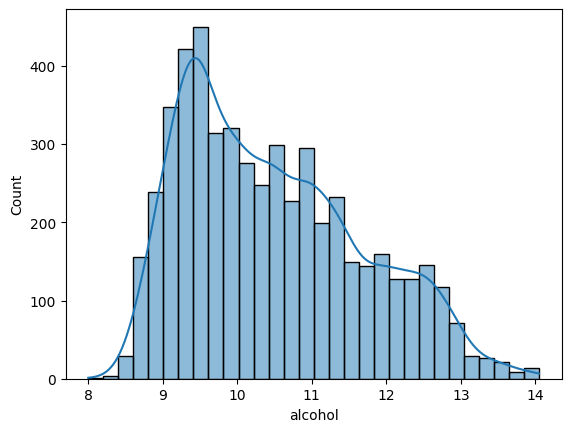

In [204]:
sns.histplot(train_set[target_r], kde = True)

In [205]:
train_set_r.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5197 entries, 1916 to 860
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         5197 non-null   float64
 1   volatile acidity      5197 non-null   float64
 2   citric acid           5197 non-null   float64
 3   residual sugar        5197 non-null   float64
 4   chlorides             5197 non-null   float64
 5   free sulfur dioxide   5197 non-null   float64
 6   total sulfur dioxide  5197 non-null   float64
 7   density               5197 non-null   float64
 8   pH                    5197 non-null   float64
 9   sulphates             5197 non-null   float64
 10  alcohol               5197 non-null   float64
 11  quality               5197 non-null   int64  
 12  class                 5197 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 568.4 KB


In [206]:
train_set_r["class"] = train_set_r["class"].apply(lambda row: 1 if row == "white" else 0)
test_set_r["class"] = test_set_r["class"].apply(lambda row: 1 if row == "white" else 0)

In [209]:
corr = train_set_r.corr(numeric_only= True)
np.abs(corr[target_r]).sort_values(ascending = False)

alcohol                 1.000000
density                 0.682345
quality                 0.450403
residual sugar          0.357459
total sulfur dioxide    0.272970
chlorides               0.260508
free sulfur dioxide     0.188460
pH                      0.116497
fixed acidity           0.091964
volatile acidity        0.036041
citric acid             0.005690
sulphates               0.000412
class                        NaN
Name: alcohol, dtype: float64

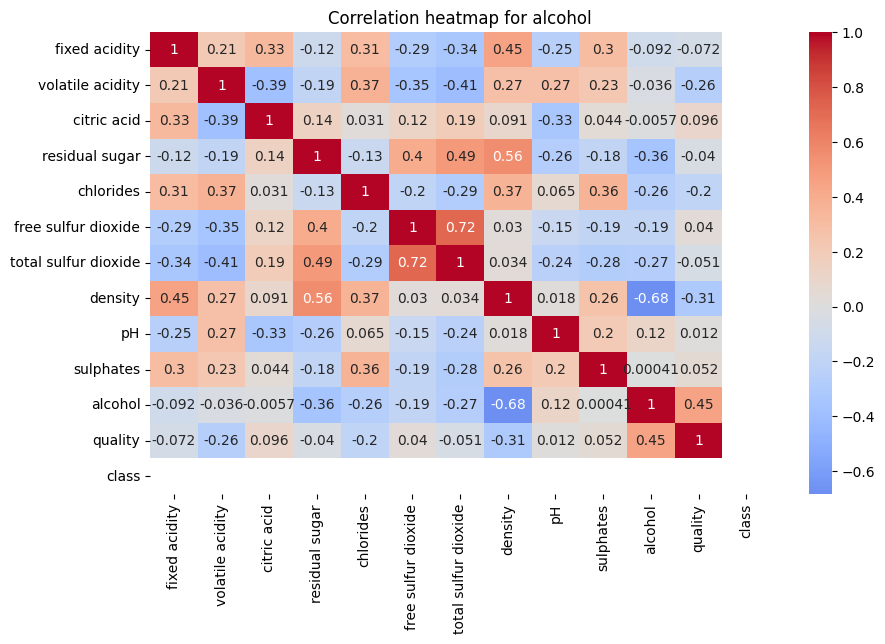

['residual sugar', 'chlorides', 'total sulfur dioxide', 'density', 'quality']

In [210]:
tl.get_features_num_regression(train_set_r,target_col= target_r,umbral_corr=0.2,pvalue=0.5,mostrar=True)

In [211]:
features_num = ['residual sugar', 'chlorides', 'total sulfur dioxide', 'density', 'quality']

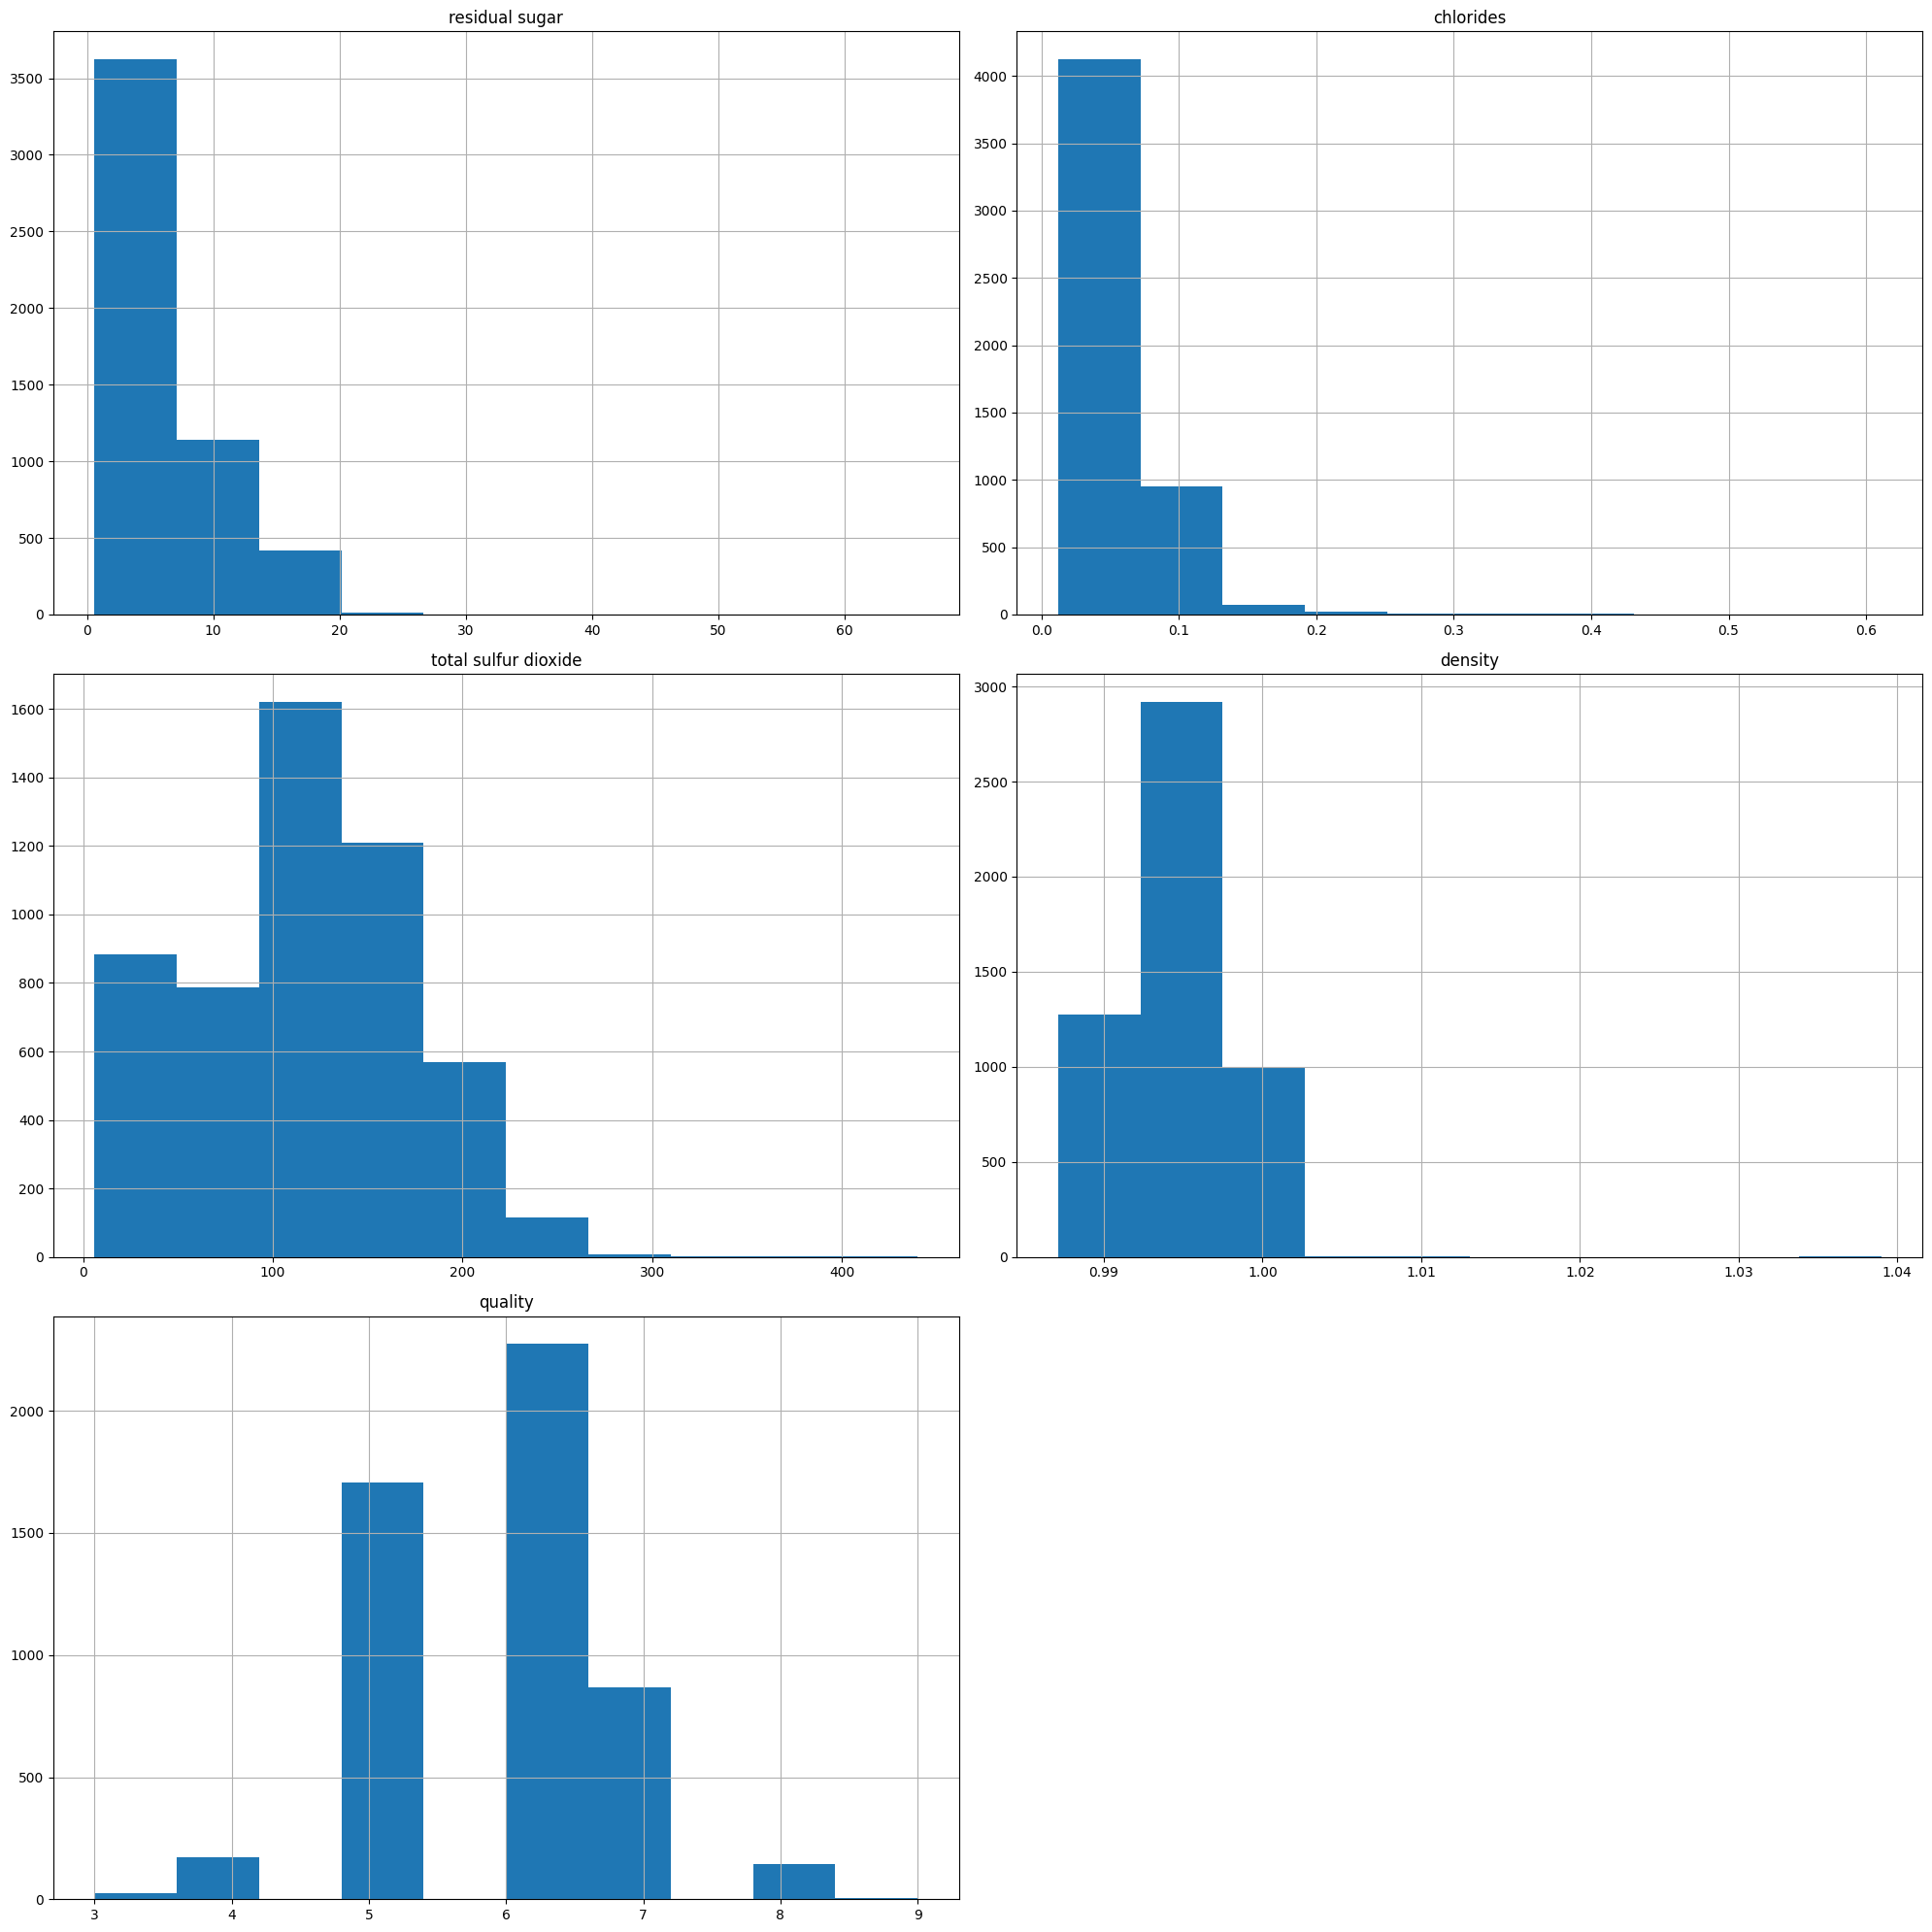

In [213]:
train_set_r[features_num].hist(figsize = (20,20))
plt.tight_layout()

In [214]:
X_train_r = train_set_r[features_num]
y_train_r = train_set_r["alcohol"]

In [215]:
X_test_r = test_set_r[features_num]
y_test_r = test_set_r["alcohol"]

In [217]:
rf_reg= RandomForestRegressor(max_depth = 10,random_state=42)
xgb_reg= XGBRegressor(max_depth = 10,random_state=42)
lgb_reg = LGBMRegressor(max_depth = 10,random_state= 42, verbose = -100)

In [216]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

In [218]:
rf_reg.fit(X_train_r,y_train_r)

RandomForestRegressor(max_depth=10, random_state=42)

In [219]:
print(np.mean(cross_val_score(rf_reg, X_train_r, y_train_r, cv = 5, scoring = "neg_mean_absolute_error")))

-0.40528517763672955


In [220]:
xgb_reg.fit(X_train_r,y_train_r)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=10,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=None,
             n_jobs=None, num_parallel_tree=None, ...)

In [221]:
print(np.mean(cross_val_score(xgb_reg, X_train_r, y_train_r, cv = 5, scoring = "neg_mean_absolute_error")))

-0.3521688725867619


In [222]:
lgb_reg.fit(X_train_r,y_train_r)

LGBMRegressor(max_depth=10, random_state=42, verbose=-100)

In [223]:
print(np.mean(cross_val_score(lgb_reg, X_train_r, y_train_r, cv = 5, scoring = "neg_mean_absolute_error")))

-0.4093586385634988


Se entrenaron y evaluaron tres modelos de regresión (Random Forest, XGBoost y LightGBM) con el objetivo de predecir el contenido de alcohol a partir de variables numéricas seleccionadas del conjunto de datos. Tras realizar validación cruzada con 5 particiones y usar el error absoluto medio (MAE) como métrica principal, se obtuvieron los siguientes resultados:

Random Forest: MAE ≈ 0.405
XGBoost: MAE ≈ 0.352
LightGBM:  MAE ≈ 0.409

Dado que la variable alcohol tiene un rango de valores entre 8.00 y 14.05 (media ≈ 10.49), estos errores representan menos del 6.7% del rango total y menos del 4% del valor medio, lo cual indica un desempeño muy aceptable en términos absolutos.

Entre los modelos evaluados, XGBoost mostró el mejor rendimiento, reduciendo el error promedio en comparación con Random Forest. Esto sugiere que XGBoost es una opción más eficaz para este problema de regresión, al capturar mejor las relaciones no lineales entre las variables predictoras y el contenido de alcohol.

Pero vamos a ajustar hiperparametros sobre XGBoost que fue el mejor modelo de los tres utilizados


In [235]:
param_grid = {
    'max_depth': [4, 6, 8, 10],
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators': [100, 200],
    'subsample': [0.8, 1],
    'colsample_bytree': [0.8, 1]
}

xgb = XGBRegressor(random_state=42)

xgb_grid = GridSearchCV(
    estimator=xgb,
    param_grid=param_grid,
    cv=5,
    scoring='neg_mean_absolute_error',
    n_jobs=-1,
    verbose=1
)

xgb_grid.fit(X_train_r, y_train_r)

Fitting 5 folds for each of 96 candidates, totalling 480 fits


GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, feature_weights=None,
                                    gamma=None, grow_policy=None,
                                    importance_type=None,
                                    interaction_constraints=None...
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.8, 1],
                         'learning_rate': [0.01, 0.05, 0.1],
                         'max_depth': [4, 6, 8, 10], 'n_estimators': [100, 200],
                         'subsample': [0.8, 1]},
             scoring='neg_mean_absolute_error', verbose=1)

In [237]:
print("Mejor MAE:", -xgb_grid.best_score_)

Mejor MAE: 0.34437065911626175


In [238]:
print("Mejores parámetros:", xgb_grid.best_params_)

Mejores parámetros: {'colsample_bytree': 1, 'learning_rate': 0.1, 'max_depth': 10, 'n_estimators': 200, 'subsample': 0.8}


In [241]:
y_pred_g = xgb_grid.best_estimator_.predict(X_test_r)
print("MAE:", mean_absolute_error(y_test_r,y_pred_g))
print("MAPE:", mean_absolute_percentage_error(y_test_r,y_pred_g))
print("RMSE:", np.sqrt(mean_squared_error(y_test_r, y_pred_g)))

MAE: 0.31685416436806707
MAPE: 0.029920907514269037
RMSE: 0.4948268748115913


El modelo XGBoost Regressor optimizado es altamente eficaz para predecir la calidad del vino en este dataset. Sus métricas de error indican una muy buena capacidad predictiva, con errores bajos y estables. Esto sugiere que el modelo ha logrado capturar las relaciones no lineales entre las variables fisicoquímicas y la calidad del vino.

